## KNN算法逻辑

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])

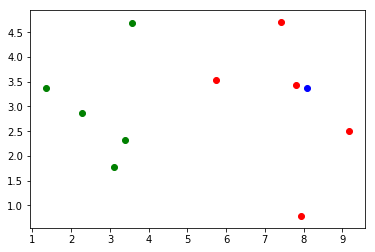

In [3]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')

In [5]:
distances = []
for item in raw_data_X:
    dist = np.sum(np.square(item - x))
    distances.append(np.sqrt(dist))
print(distances)

for label, value in zip(raw_data_y,distances):
    print(label, '  ' ,value)

[4.812566907609877, 5.229270827235305, 6.749798999160064, 4.6986266144110695, 5.83460014556857, 1.4900114024329525, 2.354574897431513, 1.3761132675144652, 0.3064319992975, 2.5786840957478887]
0    4.812566907609877
0    5.229270827235305
0    6.749798999160064
0    4.6986266144110695
0    5.83460014556857
1    1.4900114024329525
1    2.354574897431513
1    1.3761132675144652
1    0.3064319992975
1    2.5786840957478887


In [6]:
rank = np.argsort(distances)

print(rank)

[8 7 5 6 9 3 0 1 4 2]


In [7]:
k = 5

topK_y = [raw_data_y[i] for i in rank[:k]]
print(topK_y)

[1, 1, 1, 1, 1]


In [8]:
votes = Counter(topK_y)
votes.most_common(1)[0][0]

1

## 实现自己的KNN

In [39]:
class KNNClassifier:
    def __init__(self, k):
        
        assert k >=1, "K must be valid"
        self.k = k 
        self._X_train = None
        self._y_train = None
    
    def fit(self, X_train , y_train):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."
        
        self._X_train = X_train
        self._y_train = y_train
        
        return self
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"
        
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
        
        pass
    def __repr__(self):
        return "KNN(k=%d)" % self.k

## 用自己的KNN算法对Sklearn鸢尾花数据集进行分类

In [41]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [42]:
X = X[y<2,:2]
y = y[y<2]

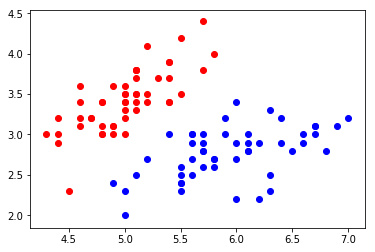

In [43]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [45]:
KNN_Classifier = KNNClassifier(k=6)
KNN_Classifier.fit(X_train,y_train)

KNN(k=6)

In [91]:
KNN_Classifier.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0])

## 调用Sklearn中的KNN算法对鸢尾花数据集进行分类

In [99]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [100]:
X = X[y<2,:2]
y = y[y<2]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [102]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [103]:
kNN_classifier.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [104]:
kNN_classifier.score(X_test,y_test)

0.96

## 调用SKlearn中的logistic-regression对鸢尾花数据集进行分类

In [92]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
log_reg = LogisticRegression()

In [95]:
log_reg.fit(X_train,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
log_reg.predict(X_test)

array([1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1])

In [97]:
log_reg.score(X_test,y_test)

0.9210526315789473